**Predicting Revenue of an Ice Cream Shop depending upon the Temperature.**

So we have a dataset of a Ice Cream Shop wherein

*   "Temperature" is independent variable
*   "Revenue" is dependent variable

So we're going to build a **Decision Tree Regressor** to find the relation between these two variables.






Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

Import the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


To check whether we have Missing Value

In [7]:
df.isnull().sum().sum()

0

Data Visualization

Text(0.5, 1.0, 'Temperature v/s Revenue')

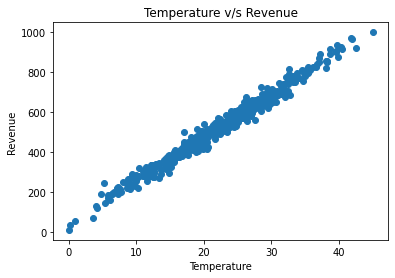

In [8]:
plt.scatter(df.Temperature,df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature v/s Revenue')

*this clearly shows that there is a linear relationship between the two; hence we'll make a simple Linear Regression model*

Validating the correlation matrix using Heatmap

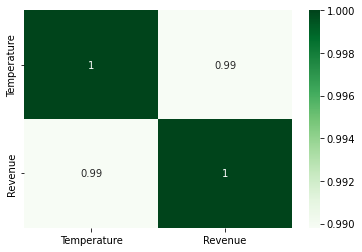

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

Check the outliers

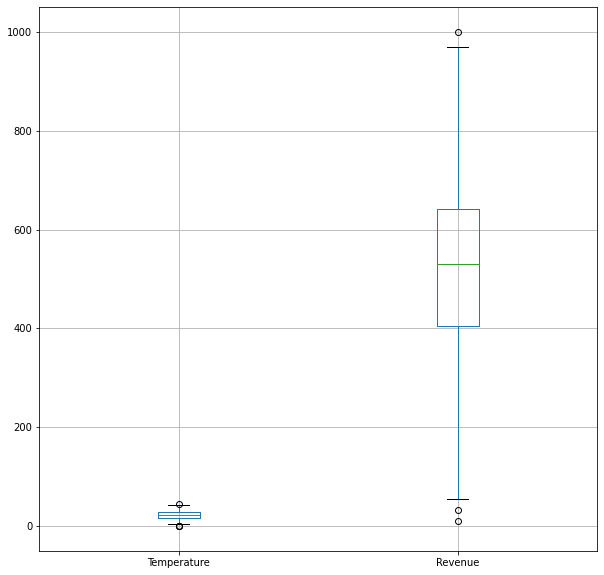

In [10]:
plt.figure(figsize=(10,10))
df.boxplot()

Since there are 3 to 4 outliers we can move ahead with it.

**Feature Scaling**


Splitting the Data for Training and Testing

In [37]:
x=np.array(df.Temperature.values)

y= np.array(df.Revenue.values)

In [24]:
from sklearn.preprocessing import StandardScaler
stanscale = StandardScaler()
x=stanscale.fit_transform(x.reshape(-1, 1))
y=stanscale.fit_transform(y.reshape(-1, 1))

In [26]:
x

array([[ 2.88646938e-01],
       [ 4.66472813e-01],
       [ 6.87207155e-01],
       [-2.02377839e-01],
       [-1.32645236e+00],
       [-9.74212604e-01],
       [-1.05392466e+00],
       [ 1.06348347e+00],
       [-2.62791798e+00],
       [ 1.16677850e+00],
       [-1.33241706e+00],
       [-2.29561034e+00],
       [-4.22883244e-01],
       [-1.06421991e+00],
       [ 2.13984539e+00],
       [-4.63520159e-01],
       [ 4.57841071e-01],
       [ 2.50770714e+00],
       [ 9.09618484e-01],
       [-5.64120830e-02],
       [ 3.98800292e-01],
       [-8.67631874e-01],
       [ 4.78581709e-02],
       [-7.38537629e-01],
       [ 2.03936834e-01],
       [-4.02300861e-01],
       [-8.12379770e-01],
       [ 8.59615819e-01],
       [-3.96575215e-01],
       [ 1.59340614e+00],
       [ 2.41301047e-01],
       [-8.65576964e-01],
       [-1.66181939e+00],
       [-4.94418314e-01],
       [ 1.65630865e+00],
       [ 1.83293659e+00],
       [ 6.46925683e-03],
       [-5.82960408e-01],
       [ 1.1

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Using Decision Tree Regressor Model

In [29]:
regressor = DecisionTreeRegressor()

Train the model

In [31]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

Making Predictions and Checking Accuracy

In [32]:
ypred = regressor.predict(x_test)

In [33]:
ypred

array([ 0.76001397,  0.93639544, -0.09032116,  0.99908772, -0.35787329,
       -0.60351281,  0.63878163,  0.00886707,  0.03735371,  0.39720886,
       -0.78109879,  0.7639318 , -0.62482956,  0.76001397, -0.25255822,
       -2.00499063,  0.16624294,  0.23786102,  0.73137498, -0.14329464,
        0.61817881, -0.35787329,  0.18004342, -0.59474051, -1.04127128,
        1.30614007,  0.12571426,  0.76001397,  1.29197884,  0.02927641,
       -1.76328451, -0.01914447, -0.17314559,  1.6132537 ,  1.12938288,
       -0.38683705,  0.71161729, -0.17314559, -0.81180821,  2.28236712,
       -1.38583486, -0.57039146, -1.50940546, -0.53849122,  0.74354455,
        0.47398418, -0.17314559,  2.15280627, -2.79076772,  0.76001397,
        0.05013967,  0.68170472,  1.8756925 , -1.37936228, -1.31169725,
       -0.26455298, -0.38453344, -0.72705984,  0.02927641,  1.30614007,
        0.12571426,  0.7639318 , -1.38762507,  0.058048  ,  0.59133586,
       -1.38762507,  0.16475842, -0.65659518, -1.01699838,  1.30

Text(0, 0.5, 'actual_red/pred/green')

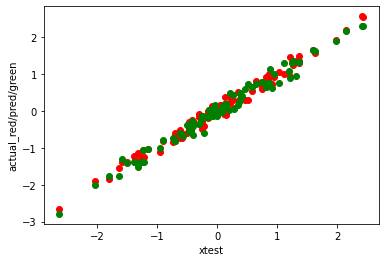

In [34]:
plt.scatter(x_test,y_test, color='red')
plt.scatter(x_test,ypred, color='green')
plt.xlabel('xtest')
plt.ylabel('actual_red/pred/green')

In [35]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [36]:
r2_score(y_test,ypred)

0.9635471732142511

Predictions are 96.35% accurate.

For Better Accuracy let's try Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [43]:
model1.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred = model1.predict(x_test)

In [46]:
r2_score(y_test, y_pred)


0.9845290468141842

Predictions are 98.37% accurate.